<a href="https://colab.research.google.com/github/prathwishshetty/DS5500-Homework-1/blob/master/DS5500_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem 1**
Confirm your group for the second project component.  

**Posted on Piazza**

##**Problem 2**

Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (distribution
of income across countries and continents over time). Include a link to the original.

Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it
effectively visualize what is being asked? Why or why not?


###**Solution**

I have decided to critique Rutu Nanavati's visualization, the link to the  can be found here. [Visualization Link](https://github.com/nanavatirutu/DS5500)  




*   I had decided to use intreactive visualization whereas Rutu has taken a diffrent approach of using static visualizations.
*   I have tried to fit in as much information as possible in a single graph whereas she has split the data into multiple facets(contienents) and used lin graphs to show changes overtime.

1.   Pro's of my method 
    * Fit's in  lot of data in a single plot, unlike rutu's which uses multiple graphs. hence can act as a single source for information regarding all the data.
    * 
2.   Pro's of Rutu's method
    * Use of heatmaps makes it a little harder to interpret when compared to line plots, making the map easirt to read. Also use of line plots as a timeseries lets use see changes in trends easily
    * 


 




##**Problem 3**  
Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (relationship between income, life expectancy, and child mortality over time). Include a link to the original. 
 
Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?


###**Solution**

I have decided to critique Rutu Nanavati's visualization again, the link to the  can be found here. [Visualization Link](https://github.com/nanavatirutu/DS5500)  




*   Rutu and I have similar approach to this problem by plotting each of the variables as their own line plots. While Rutu has made graphs which has lines for all the continents in a single plot and each varaibles seperately. I have an option to select an individual country by choice and stacked all of them in a single place to make it easier to understand. Also she has used a correlation matrix to identify the relationship between variables. 

1.   **Pro's of my method** 
    * All the data is available in a single plot with sublots that makes it easier to understand. 

2.   **Pro's of Rutu's method**
    * Use of correlation matrix has made identifying the realtionship between the variables easier, but it doesn't state the time frame for correlation matrix used



##**Problem 4**  
Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis).  

Visualize the model(s) and comment on what they tell you about the relationship between income and life
expectancy over time.

In [0]:
#@title Import the required packages and clone the repo
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

!git clone https://github.com/open-numbers/ddf--gapminder--systema_globalis

In [0]:
#@title CODE[`regression model function`]
def myRegressionModel(x,x_label,y,y_label,title):
  # # Create linear regression object
  regr = linear_model.LinearRegression()

  # # Train the model using the training sets
  regr.fit(x, y)

  # # Make predictions using the testing set
  y_pred = regr.predict(x)

  # # # The coefficients
  print('Coefficients: \n', regr.coef_)
  # # # The mean squared error
  print("Mean squared error: %.2f"% mean_squared_error(y, y_pred))
  # # # Explained variance score: 1 is perfect prediction
  print('Variance score: %.4f' % r2_score(y, y_pred))

  print('Durbin Watson Statistics: %.2f' % sm.stats.stattools.durbin_watson(np.abs(y - y_pred),0))

  print('X coef : %.2f'% regr.coef_)

  print('Intercept : %.2f'% regr.intercept_)

  # # # Plot outputs
  plt.scatter(x, y)
  plt.plot(x, y_pred, color='orange')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)


  plt.show()

In [0]:
#@title Process data for the plots

#Location of the datafile that we need to read
life_expent   = 'ddf--gapminder--systema_globalis/ddf--datapoints--life_expectancy_years--by--geo--time.csv'
gdp_file      = 'ddf--gapminder--systema_globalis/ddf--datapoints--income_per_person_long_series--by--geo--time.csv'

#Read the csv into memory
gdp         = pd.read_csv(gdp_file)[['time', 'income_per_person_long_series']]
life        = pd.read_csv(life_expent)[['time', 'life_expectancy_years']]

#Rollup data from time -- continent level to just time level 
life_rolled = life.groupby(['time']).mean().reset_index()
gdp_rolled =   gdp.groupby(['time']).mean().reset_index()

#Join both the dataframe to make one dataframe
gdp_geo     = pd.merge(gdp_rolled,
                       life_rolled,
                       how='inner',
                       left_on="time",
                       right_on="time").rename(columns={"time":"year",
                                                        "income_per_person_long_series": "income",
                                                        "life_expectancy_years": "life_exp"})
                       
# Split the data into training/testing sets
gdp_geo_life  =  [[x] for x in gdp_geo.life_exp]

# Split the targets into training/testing sets
gdp_geo_income = [[x] for x in gdp_geo.income]

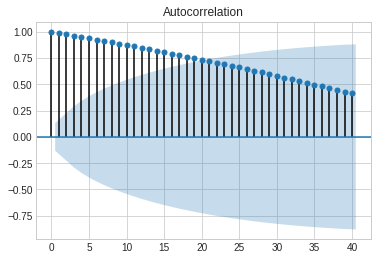

In [4]:
sm.graphics.tsa.plot_acf(gdp_geo_life, lags=40)
plt.show()

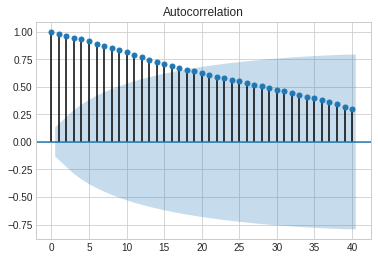

In [5]:
sm.graphics.tsa.plot_acf(gdp_geo_income, lags=40)
plt.show()

Coefficients: 
 [[0.00265964]]
Mean squared error: 16.14
Variance score: 0.9254
Durbin Watson Statistics: 0.10
X coef : 0.00
Intercept : 30.27


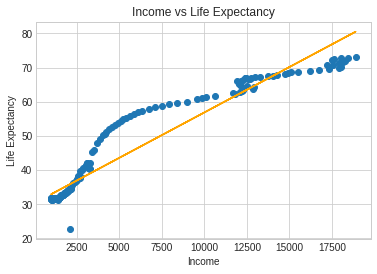

In [6]:
myRegressionModel(gdp_geo_income,"Income",gdp_geo_life,"Life Expectancy","Income vs Life Expectancy")

Coefficients: 
 [[5.52225585e-05]]
Mean squared error: 0.01
Variance score: 0.8814
Durbin Watson Statistics: 0.15
X coef : 0.00
Intercept : 3.45


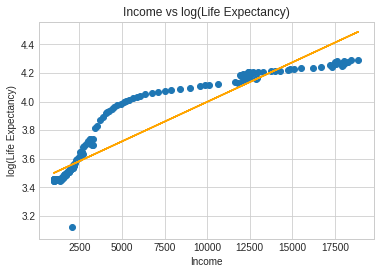

In [15]:
#@title Plot of log of Life Expectancy and  Income with it's prediction

myRegressionModel(gdp_geo_income,"Income",np.log(gdp_geo_life),"log(Life Expectancy)","Income vs log(Life Expectancy)")

Coefficients: 
 [[0.31371933]]
Mean squared error: 0.00
Variance score: 0.9618
Durbin Watson Statistics: 0.43
X coef : 0.31
Intercept : 1.21


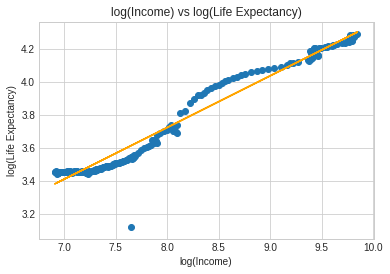

In [8]:
#@title Plot of log of Life Expectancy and  log of Income with it's prediction
myRegressionModel(np.log(gdp_geo_income),'log(Income)',np.log(gdp_geo_life),'log(Life Expectancy)',"log(Income) vs log(Life Expectancy)")

I have started by checking for autocorrelation  and the plot indicates autocorrelation in data.

Consequences of autocorrelation:  


*  The OLS estimators are still unbiased and consistent.
*  The estimated variances of the regression coefficients will be biased and inconsistent, and therefore hypothesis testing is no longer valid. $R^2$ will be overestimated and the t-statistics will tend to be higher

Then I have used a simple linear regression equation to plot the income vs life expectancy and started on tuning the model by changing the input to the model.
* Model 1: Income vs Life Expectancy  
    This is a decent model which has an explained variance of 92.54% and lowe mean square errors
* Model 2: Income vs `log(Life Expectancy)`  
    The performance of this model is not as good as the previous as it reduces the explained variance 88.14%
* Model 3: `log(Income)` vs Life Expectancy
    This is by far the best performing model we have with an explained variance of 96.18% and low mean squared errors as well

We can see that there is a postive correlation of Life Expectancy w.r.t to GDP, and this is the expected trends. 


##**Problem 5**

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis).  

Visualize the model(s) and comment on what they tell you about the relationship between income and child
mortality over time.

In [0]:
#@title Process data for the plots

child         = 'ddf--gapminder--systema_globalis/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv'
gdp_file      = 'ddf--gapminder--systema_globalis/ddf--datapoints--income_per_person_long_series--by--geo--time.csv'

gdp         = pd.read_csv(gdp_file)[['time', 'income_per_person_long_series']]
child        = pd.read_csv(child)[['time','child_mortality_0_5_year_olds_dying_per_1000_born']]
# #Rollup dataframes
child_rolled = child.groupby(['time']).mean().reset_index()
gdp_rolled   = gdp.groupby(['time']).mean().reset_index()

gdp_child     = pd.merge(gdp_rolled,
                       child_rolled,
                       how='inner',
                       left_on="time",
                       right_on="time").rename(columns={"time":"year",
                                                        "income_per_person_long_series": "income",
                                                        "child_mortality_0_5_year_olds_dying_per_1000_born": "Child_Mortality"})
                       
# Split the data into training/testing sets
gdp_child_cMortality =  [[x] for x in gdp_child.Child_Mortality]

# Split the targets into training/testing sets
gdp_child_income  = [[x] for x in gdp_child.income]

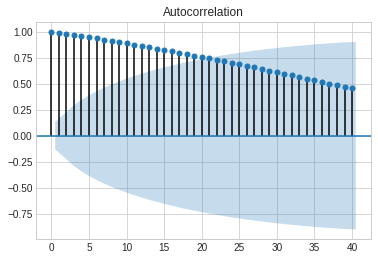

In [10]:
sm.graphics.tsa.plot_acf(gdp_child_cMortality, lags=40)
plt.show()

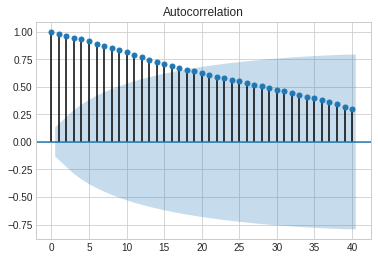

In [11]:
sm.graphics.tsa.plot_acf(gdp_child_income, lags=40)
plt.show()

Coefficients: 
 [[-35.71439821]]
Mean squared error: 3006070.53
Variance score: 0.8938
Durbin Watson Statistics: 0.01
X coef : -35.71
Intercept : 15185.19


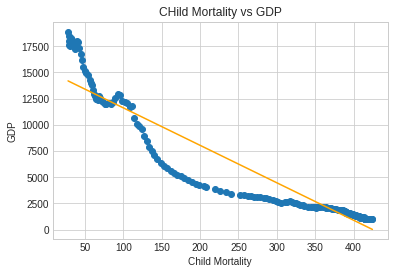

In [12]:
#@title Plot of Child Mortality vs GDP with it's prediction
myRegressionModel(gdp_child_cMortality,'Child Mortality',gdp_child_income,"GDP","CHild Mortality vs GDP")

Coefficients: 
 [[-0.00689092]]
Mean squared error: 0.02
Variance score: 0.9841
Durbin Watson Statistics: 0.02
X coef : -0.01
Intercept : 9.96


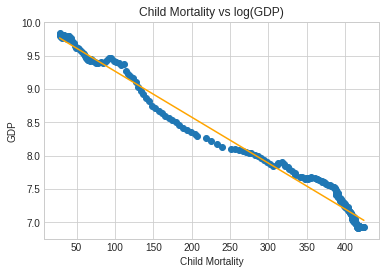

In [13]:
#@title Plot of Child Mortality and  log of GDP with it's prediction
myRegressionModel(gdp_child_cMortality,'Child Mortality',np.log(gdp_child_income),"GDP","Child Mortality vs log(GDP)")

Coefficients: 
 [[-1.18452875]]
Mean squared error: 0.07
Variance score: 0.9270
Durbin Watson Statistics: 0.01
X coef : -1.18
Intercept : 14.41


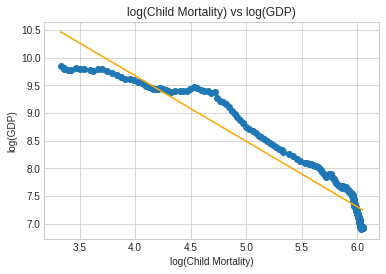

In [14]:
#@title Plot of log of Child Mortality and  log of GDP with it's prediction
myRegressionModel(np.log(gdp_child_cMortality),'log(Child Mortality)',np.log(gdp_child_income),"log(GDP)","log(Child Mortality) vs log(GDP)")

I have started by checking for autocorrelation  and the plot indicates autocorrelation in data.

Consequences of autocorrelation:
    * The OLS estimators are still unbiased and consistent.
    * The estimated variances of the regression coefficients will be biased and inconsistent, and therefore hypothesis testing is no longer valid. $R^2$ will be overestimated and the t-statistics will tend to be higher

Then I have used a simple linear regression equation to plot the GDP vs child mortality and started on tuning the model by changing the input to the model.

* Model 1: GDP vs Child Mortality  
    This is a decent model which has an explained variance of 89.38% and low mean square errors
* Model 2:  Child Mortality  vs `log(GDP)`
    The performance of this model is vastly superior to the previous models as this increases the explained variance to 98.41%
* Model 3: `log(Child Mortality)`  vs `log(GDP)`
    This model is better than the first model but not as good as the second we have got and wer can continue using the second model as our main model.

We can see that there is a negative relation between child mortality and GDP as expected i.e. if GDP increases over time then child mortality will decrease.
